Separate subcellular space into three distinct regions (innermost being nucleus) and calculates transcripts in each. 

In [1]:
import numpy as np
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
from copy import copy

In [2]:
drpath = '/stanley/WangLab/Connie/02.TEMPOmap/04.revisionForeskin254Gene/output'
apath = '/stanley/WangLab/Data/Processed/2022-10-15-Rena-SkinCulture254-gene/output'
adata = sc.read_h5ad(os.path.join(apath, '2022-11-12-Rena-Foreskin254gene-preflt.h5ad'))
genes = adata.var.index
area_list = [1, 2, 3, 5]
area2sample = {
    1: '2h_labeling',
    2: '2h_labeling_2h_wash',
    3: '2h_labeling_4h_wash',
    4: '20h_labeling', 
    5: '2h_labeling_6h_wash', 
    6: 'STARmap'
}

In [3]:
adata

AnnData object with n_obs × n_vars = 12574 × 254
    obs: 'orig_index', 'sample', 'area', 'x', 'y', 'z', 'nuclues_volume', 'AF546', 'AF546_nucleus', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'plate_number'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'max_counts'
    layers: 'nucleus'

In [4]:
print('Foreskin')
np.unique(adata.obs['sample'], return_counts=True)

Foreskin


(array(['20h_labeling', '2h_labeling', '2h_labeling_2h_wash',
        '2h_labeling_4h_wash', '2h_labeling_6h_wash', 'STARmap'],
       dtype=object),
 array([2310, 1715, 2076, 2731, 1665, 2077]))

In [5]:
# import cell_meta (filtered by Haowen)
cell_meta = pd.read_csv('/stanley/WangLab/Connie/02.TEMPOmap/04.revisionForeskin254Gene/Nov16_skin_cluster_label_fixed.csv')
cell_meta

,Unnamed: 0,orig_index,sample,area,x,y,z,nuclues_volume,AF546,AF546_nucleus,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,volume,n_volume,nCount_RNA,nFeature_RNA,RNA_snn_res.0.08,seurat_clusters
0,0,0,2h_labeling,275680,63,6724,22,140797,0,0,87,4.477337,146,4.990433,275680,140797,146,87,2,2
1,1,1,2h_labeling,280621,63,3816,18,46370,0,0,64,4.174387,121,4.804021,280621,46370,121,64,1,1
2,3,3,2h_labeling,771134,121,9836,19,191065,1,0,142,4.962845,486,6.188264,771134,191065,486,142,1,1
3,4,4,2h_labeling,1205013,146,5887,27,164774,0,0,68,4.234107,141,4.955827,1205013,164774,141,68,2,2
4,5,5,2h_labeling,1720379,164,13669,22,295120,1,0,122,4.812184,642,6.466145,1720379,295120,642,122,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,10492,1660,2h_labeling_6h_wash,662891,16451,2600,12,265923,3,1,50,3.931826,109,4.700480,662891,265923,109,50,0,0
8021,10493,1661,2h_labeling_6h_wash,447258,16445,5293,11,210822,1,1,46,3.850148,75,4.330733,447258,210822,75,46,0,0
8022,10494,1662,2h_labeling_6h_wash,924337,16376,6623,12,247604,1,0,72,4.290459,178,5.187386,924337,247604,178,72,0,0
8023,10495,1663,2h_labeling_6h_wash,647931,16445,14103,11,254868,0,0,56,4.043051,120,4.795791,647931,254868,120,56,0,0


In [7]:
# new meta updated 120722
cell_meta_06 = sc.read_h5ad('/stanley/WangLab/Connie/02.TEMPOmap/04.revisionForeskin254Gene/Dec07_skin_dataset_nc_umap.h5ad')
cell_meta_06 = copy(cell_meta_06.obs)

In [8]:
cell_meta_20 = sc.read_h5ad('/stanley/WangLab/Connie/02.TEMPOmap/04.revisionForeskin254Gene/Dec08_skin_dataset_20h.h5ad')
cell_meta_20_ = copy(cell_meta_20.obs)

In [31]:
cluster20h = []
for i in range(len(cell_meta_20_)):
    ct = cell_meta_20_.iloc[i]['seurat_clusters']
    if ct==0:
        cluster20h.append(1)
    elif ct==1:
        cluster20h.append(0)
    else: cluster20h.append(2)
cell_meta_20_['seurat_clusters'] = cluster20h

In [33]:
cell_meta_20_

,orig_index,sample,area,x,y,z,nuclues_volume,AF546,AF546_nucleus,n_genes_by_counts,...,total_counts,log1p_total_counts,volume,n_volume,nCount_RNA,nFeature_RNA,cell_id,norm_counts,RNA_snn_res.0.08,seurat_clusters
6522,0,20h_labeling,223519,86,5039,21,70157,1,1,62,...,127,4.852030,223519,70157,127.0,62.0,20h_labeling_0,138.857090,1,0
6523,1,20h_labeling,632844,112,6471,24,257964,3,0,138,...,444,6.098074,632844,257964,444.0,138.0,20h_labeling_1,485.453132,1,0
6524,2,20h_labeling,756089,154,11940,19,439035,1,1,164,...,738,6.605298,756089,439035,738.0,164.0,20h_labeling_2,806.901828,0,1
6525,3,20h_labeling,770465,268,5434,20,196428,0,0,114,...,484,6.184149,770465,196428,484.0,114.0,20h_labeling_3,529.187649,0,1
6526,4,20h_labeling,2450750,146,7628,25,338981,4,2,131,...,539,6.291569,2450750,338981,539.0,131.0,20h_labeling_4,589.322609,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8827,2305,20h_labeling,605721,16962,3245,12,218475,1,1,125,...,401,5.996452,605721,218475,401.0,125.0,20h_labeling_2305,438.438527,0,1
8828,2306,20h_labeling,1581601,16985,678,19,564071,3,0,135,...,530,6.274762,1581601,564071,530.0,135.0,20h_labeling_2306,579.482343,2,2
8829,2307,20h_labeling,882419,16974,1069,18,212714,4,1,97,...,268,5.594711,882419,212714,268.0,97.0,20h_labeling_2307,293.021260,0,1
8830,2308,20h_labeling,506170,17055,3551,17,289642,0,0,78,...,220,5.398163,506170,289642,220.0,78.0,20h_labeling_2308,240.539840,0,1


In [7]:
np.unique(cell_meta['sample'], return_counts=True)

(array(['2h_labeling', '2h_labeling_2h_wash', '2h_labeling_4h_wash',
        '2h_labeling_6h_wash'], dtype=object),
 array([1676, 2029, 2670, 1650]))

In [10]:
np.unique(cell_meta_06.obs['sample'], return_counts=True)

(array(['2h_labeling', '2h_labeling_2h_wash', '2h_labeling_4h_wash',
        '2h_labeling_6h_wash'], dtype=object),
 array([1674, 2018, 2537, 1593]))

In [9]:
area_list = [1,2,3,4,5]

In [10]:
# calculate dr_by_sample (each gene has one averaged DR per sample)
mean_by_sample = []
stdev_by_sample = []
for area in area_list:
    _adata = adata[adata.obs['plate_number']==area]
    dr = np.load(os.path.join(drpath, f'DR_area{area}.npy'), allow_pickle=True)
    midd = np.zeros(dr.shape)
    peri = np.zeros(dr.shape) 
    for i in range(dr.shape[0]):
        for j in range(dr.shape[1]):
            if type(dr[i,j]) == list:
                midd[i,j] = np.count_nonzero(np.array(dr[i,j])<0.909)
                peri[i,j] = np.count_nonzero(np.array(dr[i,j])>=0.909) 
    nuclsum = np.sum(_adata.layers['nucleus'], axis=1)
    middsum = np.sum(midd, axis=1)
    perisum = np.sum(peri, axis=1)
    # filter
    if area2sample[area] == '20h_labeling':
            _cell_meta = cell_meta_20_[cell_meta_20_['sample']==area2sample[area]]
        else:
            _cell_meta = cell_meta_06[cell_meta_06['sample']==area2sample[area]]
    # if area2sample[area] != 'STARmap':
    _cell_meta = cell_meta[cell_meta['sample']==area2sample[area]]
    flt = np.isin(_adata.obs['orig_index'], _cell_meta['orig_index'])
    nuclsum = nuclsum[flt]
    middsum = middsum[flt]
    perisum = perisum[flt]

    region_sum = np.array(list(zip(nuclsum, middsum, perisum)), dtype=int)
    region_sum = np.array([row/sum(row) for row in region_sum])
    region_mean = np.mean(region_sum, axis=0)
    region_stdev = np.std(region_sum, axis=0)
    mean_by_sample.append(region_mean)
    stdev_by_sample.append(region_stdev)

NameError: name 'cell_meta' is not defined

In [6]:
df_mean_by_sample = pd.DataFrame(mean_by_sample, columns=['nucl', 'midd', 'peri'])
df_stdev_by_sample = pd.DataFrame(stdev_by_sample, columns=['nucl', 'midd', 'peri'])
df_mean_by_sample['sample'] = [area2sample[i] for i in area_list]
df_stdev_by_sample['sample'] = [area2sample[i] for i in area_list]
df_mean_by_sample

,nucl,midd,peri,sample
0,0.582332,0.306554,0.111114,2h_labeling
1,0.418339,0.425275,0.156386,2h_labeling_2h_wash
2,0.399020,0.456105,0.144875,2h_labeling_4h_wash
3,0.329719,0.526549,0.143732,2h_labeling_6h_wash


In [7]:
# reorder sample list
sample_order = [0,1,2,3]
df_mean_by_sample['order'] = sample_order
df_mean_by_sample.sort_values(by='order', inplace=True)
df_stdev_by_sample['order'] = sample_order
df_stdev_by_sample.sort_values(by='order', inplace=True)
df_stdev_by_sample

,nucl,midd,peri,sample,order
0,0.122107,0.099378,0.088401,2h_labeling,0
1,0.145619,0.128392,0.103753,2h_labeling_2h_wash,1
2,0.174042,0.148161,0.103571,2h_labeling_4h_wash,2
3,0.143200,0.137511,0.099527,2h_labeling_6h_wash,3


(([0, 1, 2, 3],
  [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')]),
 <matplotlib.legend.Legend at 0x2af03586a640>)

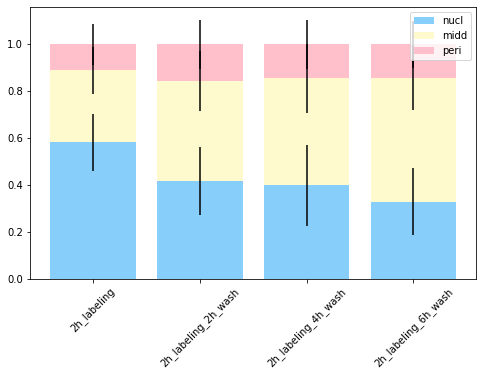

In [8]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(df_mean_by_sample['sample'], df_mean_by_sample['nucl'], yerr=df_stdev_by_sample['nucl'], label='nucl', color='lightskyblue')
ax.bar(df_mean_by_sample['sample'], df_mean_by_sample['midd'], yerr=df_stdev_by_sample['midd'], bottom=df_mean_by_sample['nucl'], label='midd', color='lemonchiffon')
ax.bar(df_mean_by_sample['sample'], df_mean_by_sample['peri'], yerr=df_stdev_by_sample['peri'], bottom=np.sum((df_mean_by_sample['nucl'], df_mean_by_sample['midd']), axis=0), label='peri', color='pink')
plt.xticks(rotation=45), plt.legend()

In [11]:
fig.savefig(os.path.join(drpath, 'figures', 'skin_subcellular_pct_allCells.pdf'))

### separate by cell type

In [11]:
celltype = {
    0: 'melanocyte',
    1: 'fibroblast',
    2: 'keratinocyte'
}

In [14]:
area_list = [1,2,3,4,5]

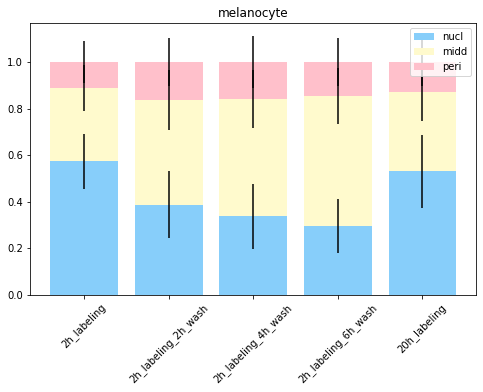

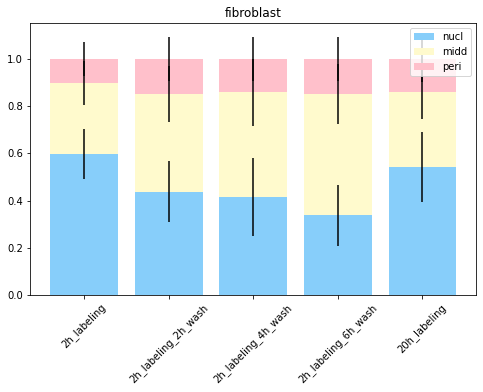

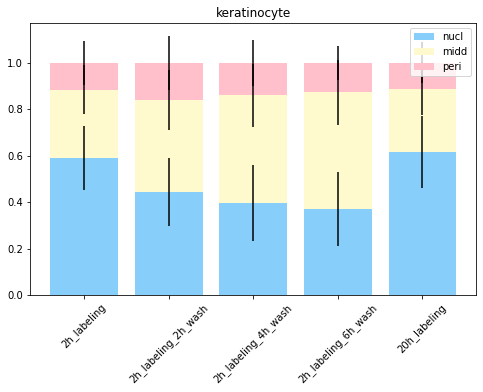

In [34]:
for p in [0,1,2]:
    mean_by_sample = []
    stdev_by_sample = []
    for area in area_list:
        _adata = adata[adata.obs['plate_number']==area]
        dr = np.load(os.path.join(drpath, f'DR_area{area}.npy'), allow_pickle=True)
        midd = np.zeros(dr.shape)
        peri = np.zeros(dr.shape) 
        for i in range(dr.shape[0]):
            for j in range(dr.shape[1]):
                if type(dr[i,j]) == list:
                    midd[i,j] = np.count_nonzero(np.array(dr[i,j])<0.909)
                    peri[i,j] = np.count_nonzero(np.array(dr[i,j])>=0.909) 
        nuclsum = np.sum(_adata.layers['nucleus'], axis=1)
        middsum = np.sum(midd, axis=1)
        perisum = np.sum(peri, axis=1)
        # filter
        if area2sample[area] == '20h_labeling':
            _cell_meta = cell_meta_20_[cell_meta_20_['sample']==area2sample[area]]
        else:
            _cell_meta = cell_meta_06[cell_meta_06['sample']==area2sample[area]]
        flt = np.isin(_adata.obs['orig_index'], _cell_meta['orig_index'])
        nuclsum = nuclsum[flt]
        middsum = middsum[flt]
        perisum = perisum[flt]
        # cell type
        ctype = _cell_meta['seurat_clusters']
        nuclsum = nuclsum[ctype==p]
        middsum = middsum[ctype==p]
        perisum = perisum[ctype==p]
        # mean and stdev
        region_sum = np.array(list(zip(nuclsum, middsum, perisum)), dtype=int)
        region_sum = np.array([row/sum(row) for row in region_sum])
        region_mean = np.mean(region_sum, axis=0)
        region_stdev = np.std(region_sum, axis=0)
        mean_by_sample.append(region_mean)
        stdev_by_sample.append(region_stdev)
    # dataframe
    df_mean_by_sample = pd.DataFrame(mean_by_sample, columns=['nucl', 'midd', 'peri'])
    df_stdev_by_sample = pd.DataFrame(stdev_by_sample, columns=['nucl', 'midd', 'peri'])
    df_mean_by_sample['sample'] = [area2sample[a] for a in area_list]
    df_stdev_by_sample['sample'] = [area2sample[a] for a in area_list]
    # reorder sample list
    sample_order = [0,1,2,4,3]
    df_mean_by_sample['order'] = sample_order
    df_mean_by_sample.sort_values(by='order', inplace=True)
    df_stdev_by_sample['order'] = sample_order
    df_stdev_by_sample.sort_values(by='order', inplace=True)
    # plot
    fig, ax = plt.subplots(figsize=(8,5))
    ax.bar(df_mean_by_sample['sample'], df_mean_by_sample['nucl'], yerr=df_stdev_by_sample['nucl'], label='nucl', color='lightskyblue')
    ax.bar(df_mean_by_sample['sample'], df_mean_by_sample['midd'], yerr=df_stdev_by_sample['midd'], bottom=df_mean_by_sample['nucl'], label='midd', color='lemonchiffon')
    ax.bar(df_mean_by_sample['sample'], df_mean_by_sample['peri'], yerr=df_stdev_by_sample['peri'], bottom=np.sum((df_mean_by_sample['nucl'], df_mean_by_sample['midd']), axis=0), label='peri', color='pink')
    plt.xticks(rotation=45)
    plt.legend()
    plt.title(celltype[p])
    fig.savefig(os.path.join(drpath, 'figures', f'skin_subcellular_pct_{celltype[p]}_1207.pdf'))